In [1]:
import import_ipynb
from StructureEvolution import *
from scipy.integrate import quad

from scipy.special import spherical_jn

importing Jupyter notebook from StructureEvolution.ipynb
importing Jupyter notebook from RecombHistory.ipynb
importing Jupyter notebook from BackgroundCosmology.ipynb
The surface of last scattering occured at x_* = -6.98 and z_* = 1068.80.

The half-way point of recombination occured at x_r = -7.16 and z_r = 1291.14.

Using only the Saha equation, the half-way point of recombination occured at x_r = -7.23 and z_r = 1383.57.

------------------------------
k: 0
xtc: -15.0


BackgroundCosmology.ipynb:7: RuntimeWarning: overflow encountered in exp
  "outputs": [],
BackgroundCosmology.ipynb:10: RuntimeWarning: overflow encountered in exp
  "import numpy as np\n",
BackgroundCosmology.ipynb:10: RuntimeWarning: invalid value encountered in double_scalars
  "import numpy as np\n",
StructureEvolution.ipynb:14: RuntimeWarning: overflow encountered in exp
  "from scipy.integrate import solve_ivp\n",
StructureEvolution.ipynb:25: RuntimeWarning: overflow encountered in exp
  "#kmin = 1.0/(η_spline(0.0)[0])#/m2Mpc)#7.256e-5\n",


------------------------------
k: 20
xtc: -15.0
------------------------------
k: 40
xtc: -14.0


BackgroundCosmology.ipynb:10: RuntimeWarning: overflow encountered in double_scalars
  "import numpy as np\n",
StructureEvolution.ipynb:30: RuntimeWarning: invalid value encountered in double_scalars
  "\n",


------------------------------
k: 60
xtc: -13.0
------------------------------
k: 80
xtc: -12.0
Time: 29.752684


In [55]:
#l_array = np.array([2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2150, 2300, 2450, 2600, 2750, 2900, 3000, 3200, 3400, 3600, 3800, 4000])
#l_array = np.array([2, 140, 550, 700, 1000, 1900, 2600, 3000, 3600, 4000])
l_array = np.array([2, 20, 60, 160, 300, 600, 800, 1000, 1050, 1250, 1500])
kpivot_Mpc = .05
kpivot = kpivot_Mpc/m2Mpc
ns = .96
A_s = 2.0e-9
lmax = 1500
ls = l_array[l_array < lmax]
#ls = l_array
n_l = len(ls)
np.shape(l_array)
print(n_l)

10


In [3]:
#plt.plot(l_array, color='b')
#plt.plot([i for i in range(75)], [i**2/1.4 for i in range(75)], color = 'k')

ggg = 0
for i in range(75):
    if i%7==0:
        ggg += 1

ls = np.zeros(ggg)
ind = 0
for i in range(75):
    if i%7==0:
        if ind == 0:
            ls[ind] = 2.0
        else:
            ls[ind] = i**2/1.4
        #ls[ind] = i**2/1.4
        ind += 1

n_l = len(ls)
print(ls)
print(n_l)
np.shape(ls)

[2.000e+00 3.500e+01 1.400e+02 3.150e+02 5.600e+02 8.750e+02 1.260e+03
 1.715e+03 2.240e+03 2.835e+03 3.500e+03]
11


(11,)

In [4]:
def cell_TT(l):
    """The CMB power specturm l(l + 1)/2π Cell in units of (μK)^2"""
    
    return

def matter_power_spectrum(k, x):
    """The matter power-spectrum at wavenumber k at time x = ln(a)"""
    
    return

def primordial_power_spectrum(k):
    """The primordial power-spectrum Δ(k) in P(k) = 2π^2/k^3 Δ(k)"""
    
    return A_s*(k/kpivot)**(ns - 1.0)

In [5]:
class Spherical_Bessel:
    def __init__(self, j_l_spline):
        self.j_l_spline = j_l_spline
        
    def make_spline(self):
        self.j_l_spline = BSpline(j_l_args, j_l, k=spline_order)
        return self.j_l_spline

In [56]:
# Create splines of Bessel functions j_l needed below for all ls in 'ls'
ini_spl = interp1d([1, 2, 3, 4], [1, 2, 3, 4], kind=spline_order)

n_args = 5400
j_l_args = np.linspace(0, 3500, n_args, endpoint=True)

j_l_splines = np.ndarray((n_l,), dtype=np.object)

for i in range(n_l):
    j_l = spherical_jn(ls[i], j_l_args)
    
    j_l_splines[i] = Spherical_Bessel(j_l_spline=ini_spl)
    j_l_splines[i].make_spline()

In [57]:
def source_function():
    S_small = np.zeros(shape = (ntotal, nk))
    S = np.zeros(shape = (n_high_res, n_high_res))
    
    x_grid = np.linspace(xinit, x_end, ntotal)
    
    for i in range(n_grid, ntotal):
        g = gspl(x_grid[i])[0]
        dg = g2spl(x_grid[i])[0]
        ddg = g22spl(x_grid[i])[0]
        τ = τspl(x_grid[i])[0]
        dτ = τ2spl(x_grid[i])[0]
        ddτ = τ22spl(x_grid[i])[0]
        hp = getHPrime(x_grid[i])
        dhp = getdHPrime(x_grid[i])
        ddhhp = .5*H0**2.0*((Ωb + Ωm)/np.exp(x_grid[i]) + 4.0*Ωr/np.exp(2.0*x_grid[i]) + 4.0*ΩΛ*np.exp(2.0*x_grid[i]))
    
        for j in range(nk):
            Π = Θ[i, 2, j]
            dΠ = dΘ[i, 2, j]
            ddΠ = .4*c*ks[j]*(-dhp*Θ[i, 1, j]/hp + dΘ[i, 1, j])/hp + .3*(ddτ*Π + dτ*dΠ) - (.6*c*ks[j]/hp)*((-dhp/hp)*Θ[i, 3, j] + dΘ[i, 3, j])
            
            part1 = g*(Θ[i, 0, j] + Ψ[i, j] + Π/4.0)
            part2 = np.exp(-τ)*(dΨ[i, j] - dΦ[i, j])
            part3 = -(1.0/(c*ks[j]))*(g*vb[i, j]*dhp + g*hp*dvb[i, j] + hp*vb[i, j]*dg)
            part4 = ((3.0/4.0)/(c**2.0*ks[j]**2.0))*(ddhhp*g*Π + 3.0*hp*dhp*(dg*Π + g*dΠ) + hp**2.0*(ddg*Π + 2.0*dg*dΠ + g*ddΠ))
            
            S_small[i, j] = part1 + part2 + part3 + part4       
    
    S_small_spl = RectBivariateSpline(x_grid, ks, S_small)
    
    for i in range(n_high_res):
        
        for j in range(n_high_res):
            S[i, j] = S_small_spl(x_grid_high_res[i], ks_high_res[j])
        
    S_spl = RectBivariateSpline(x_grid_high_res, ks_high_res, S)
        
    return S_spl

In [58]:
# Set up k-array to evaluate Θ_l on
n_high_res = 500#5000


ks_high_res = np.exp(np.linspace(np.log(kmin), np.log(kmax), num=n_high_res))

xstartrec = -np.log(1.0 + 1630.4)
x_grid_high_res = np.linspace(xstartrec, x_end, n_high_res, endpoint=True)

S_spl = source_function()

η_high_res = np.linspace(η_grid[0], η_grid[-1], n_high_res, endpoint=True)

In [59]:
j_l_splines[0].j_l_spline(ks_high_res[0]*(η_ini - η_spline(x_grid[0])))

array([0.2016167])

In [60]:
Θ_lk = np.zeros(shape = (n_l, n_high_res))
# Solve for Θ_l(k) for all k in k-array for all l in l-array

def Θ_integrand(x, k, l):
    
    return S_spl(x, k)*j_l_splines[l].j_l_spline(ks_high_res[k]*(η_ini - η_spline(x)))

C_l = np.zeros(n_l)
C_ls = np.zeros(n_l)
start = timeit.default_timer()
for l in range(n_l):
    print(l)    
    for k in range(n_high_res):
        if k%500==0:
            print(k)
        k0 = ks_high_res[k]
        Θ_lk[l, k] = quad(Θ_integrand, -np.inf, 0, args=(k, l))[0]
        
        C_l[l] = C_l[l] + (c*k0/H0)**(ns - 1.0) * (Θ_lk[l, k]**2.0) * ((1.0/4999.0)/(k0))
    C_ls[l] = C_l[l] * (ls[l] * (ls[l] + 1.0))/(2.0*np.pi)
    
stop = timeit.default_timer()
print('Time:', stop - start)

0
0


C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.


1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
Time: 39.9036887000002


In [61]:
# Spline Θ_l(k) for all l
Θlk_spl = RectBivariateSpline(ls, ks_high_res, Θ_lk)

In [62]:
# Integrate to get C_l for all l
'''
def Cl_integrand(x, k, l):
    
    return ((c*k/H0)**(ns - 1.0))*(Θlk_spl(l, k)**2.0)*(1.0/k)

C_l = np.zeros(len(n_l))

for i in range(n_l):
    for k in range(n_high_res):
        C_l = quad(Cl_integrand, 0, np.inf, args=(k, l))[0]
'''


'\ndef Cl_integrand(x, k, l):\n    \n    return ((c*k/H0)**(ns - 1.0))*(Θlk_spl(l, k)**2.0)*(1.0/k)\n\nC_l = np.zeros(len(n_l))\n\nfor i in range(n_l):\n    for k in range(n_high_res):\n        C_l = quad(Cl_integrand, 0, np.inf, args=(k, l))[0]\n'

In [63]:
# Spline C_l
print(C_ls)
C_ls_spl = BSpline(ls, C_ls, k=spline_order)

[2.18697144e+49 2.90102211e-02 1.01013046e-02 3.67290726e-03
 1.80242726e-03 2.56682307e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


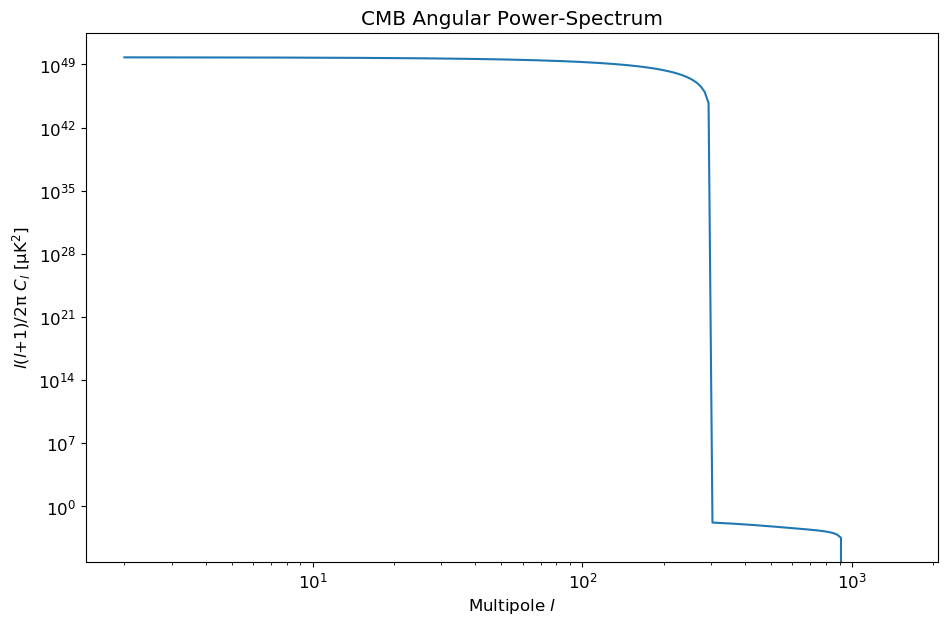

In [79]:
#Pk = np.array([matter_power_spectrum(k, x) for k in ks]).flatten()
#plt.xscale('log')
#plt.scale('log')
#plt.plot(ks*m2Mpc, Pk/m2Mpc**2.0)
#plt.show()
ls_plot = np.exp( np.linspace(np.log(2.0), np.log(lmax), 200) )
plt.figure(figsize=(11, 7), dpi = 100)
plt.title('CMB Angular Power-Spectrum')
plt.xlabel('Multipole $l$')
plt.ylabel('$l$($l$+1)/2π $C_l$ [μK$^2$]')
plt.xscale('log')
plt.yscale('log')
for i in range(n_l):
    data_C_ls = C_ls_spl(ls_plot)
plt.plot(ls_plot, data_C_ls)
plt.show()